In [1]:
!pip install wordcloud


In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os
import keras
import plotly.express as px
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk




In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Khadi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Load data
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [23]:
train.shape

(7613, 5)

In [24]:
train['text'].isna().sum()

0

In [25]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [29]:
test['text'].isna().sum()

0

In [30]:
test.shape

(3263, 4)

<Axes: >

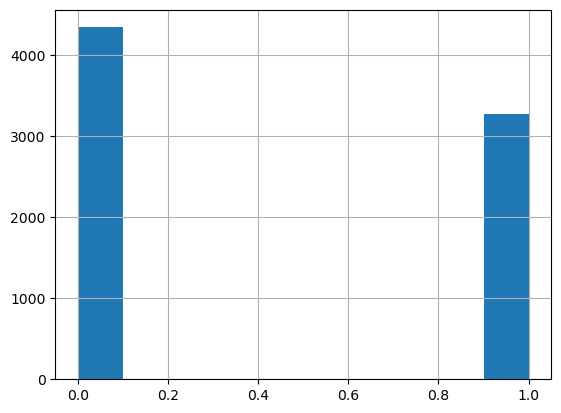

In [31]:
train['target'].hist()

In [32]:
#plot target distribution

target_counts = train['target'].value_counts().reset_index()


target_counts.columns = ['Target', 'Count']

fig = px.bar(target_counts, x='Target', y='Count', title='Frequency Distribution of Target',
             labels={'Count':'Number of Occurrences', 'Target':'Target'}, color='Target')

fig.show()


In [33]:
target_counts = train['target'].value_counts().reset_index()


target_counts.columns = ['Target', 'Count']

fig = px.pie(target_counts, values='Count', names='Target', title='Frequency Distribution of Target')

fig.show()

In [34]:
train['lenght_tweet'] = train['text'].apply(len)

In [35]:
train.head()

,id,keyword,location,text,target,lenght_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [36]:
fig = px.histogram(train, x='lenght_tweet', nbins=50, title=' length tweet distribution')

fig.show()

In [37]:
train['text'] = train['text'].astype(str)

# First, we split the tweets into individual words
words = ' '.join(train['text']).split()

# Count the frequency of each word
word_counts = Counter(words)

# Convert the dictionary to a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['Word', 'Count']

# Plot the word frequencies using a histogram
fig = px.histogram(word_counts_df, x='Word', y='Count', nbins=50, title='Word Frequency Distribution')

fig.show()

In [14]:
test['text'] = test['text'].astype(str)

# First, we split the tweets into individual words
words = ' '.join(test['text']).split()

# Count the frequency of each word
word_counts = Counter(words)

# Convert the dictionary to a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['Word', 'Count']

# Plot the word frequencies using a histogram
fig = px.histogram(word_counts_df, x='Word', y='Count', nbins=50, title='Word Frequency Distribution')

fig.show()

     


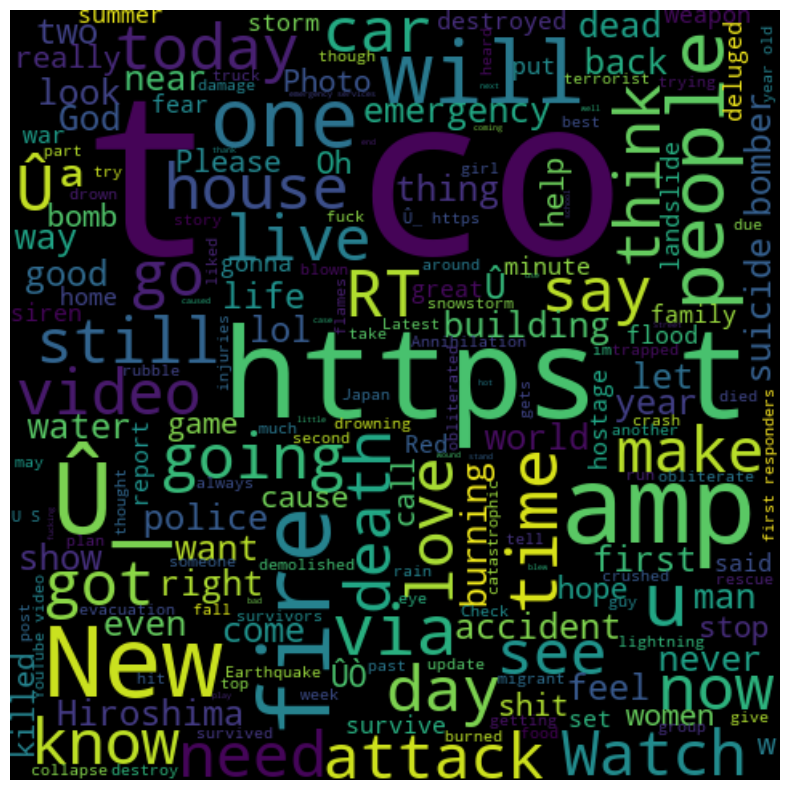

In [15]:
test['text'] = test['text'].astype(str)

# Create a single string with all tweets
text = ' '.join(test['text'])

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [18]:

# Text preprocessing
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S|www\S|https\S", '', text, flags=re.MULTILINE)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Stemming and remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)
    return text

train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)

X = train['text']
y = train['target']

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Split train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_pad, y, test_size=0.2, random_state=42)
import os

# Path to the saved model
model_path = 'LSTM_model.h5'

# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model using Keras
    model = load_model(model_path)
    print('model loaded')
else:
    # Build and train the LSTM model if the model file doesn't exist
    model = Sequential()
    model.add(Embedding(len(tokenizer.word_index)+1, 32, input_length=100))
    model.add(LSTM(64, dropout=0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)
    model.save('LSTM_model.h5')
  



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/500
191/191 [==============================] - 40s 179ms/step - loss: 0.5599 - accuracy: 0.7036 - val_loss: 0.4447 - val_accuracy: 0.7984
Epoch 2/500
191/191 [==============================] - 32s 166ms/step - loss: 0.3050 - accuracy: 0.8750 - val_loss: 0.4815 - val_accuracy: 0.7827
Epoch 3/500
191/191 [==============================] - 33s 172ms/step - loss: 0.1807 - accuracy: 0.9356 - val_loss: 0.5949 - val_accuracy: 0.7610
Epoch 4/500
191/191 [==============================] - 31s 162ms/step - loss: 0.0869 - accuracy: 0.9706 - val_loss: 0.7289 - val_accuracy: 0.7393
Epoch 5/500
191/191 [==============================] - 31s 162ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.8172 - val_accuracy: 0.7400
Epoch 6/500
191/191 [==============================] - 33s 173ms/step - loss: 0.0270 - accuracy: 0.9929 - val_loss: 0.9630 - val_accuracy: 0.7387
Epoch 7/500
191/191 [==============================] - 33s 173ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.9906 -

Epoch 57/500
191/191 [==============================] - 20s 103ms/step - loss: 0.0078 - accuracy: 0.9954 - val_loss: 1.3797 - val_accuracy: 0.7328
Epoch 58/500
191/191 [==============================] - 19s 101ms/step - loss: 0.0073 - accuracy: 0.9959 - val_loss: 1.5570 - val_accuracy: 0.7354
Epoch 59/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0075 - accuracy: 0.9957 - val_loss: 1.3000 - val_accuracy: 0.7249
Epoch 60/500
191/191 [==============================] - 20s 103ms/step - loss: 0.0071 - accuracy: 0.9957 - val_loss: 1.2573 - val_accuracy: 0.7177
Epoch 61/500
191/191 [==============================] - 19s 101ms/step - loss: 0.0057 - accuracy: 0.9969 - val_loss: 1.4811 - val_accuracy: 0.7269
Epoch 62/500
191/191 [==============================] - 19s 99ms/step - loss: 0.0049 - accuracy: 0.9962 - val_loss: 1.5050 - val_accuracy: 0.7334
Epoch 63/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0045 - accuracy: 0.9970 - val_loss: 1.

191/191 [==============================] - 21s 111ms/step - loss: 0.0044 - accuracy: 0.9969 - val_loss: 2.0667 - val_accuracy: 0.7223
Epoch 113/500
191/191 [==============================] - 22s 115ms/step - loss: 0.0044 - accuracy: 0.9966 - val_loss: 2.0944 - val_accuracy: 0.7183
Epoch 114/500
191/191 [==============================] - 21s 109ms/step - loss: 0.0045 - accuracy: 0.9967 - val_loss: 2.1255 - val_accuracy: 0.7190
Epoch 115/500
191/191 [==============================] - 20s 103ms/step - loss: 0.0044 - accuracy: 0.9972 - val_loss: 2.1883 - val_accuracy: 0.7177
Epoch 116/500
191/191 [==============================] - 21s 112ms/step - loss: 0.0044 - accuracy: 0.9964 - val_loss: 2.1395 - val_accuracy: 0.7190
Epoch 117/500
191/191 [==============================] - 20s 106ms/step - loss: 0.0044 - accuracy: 0.9972 - val_loss: 2.1351 - val_accuracy: 0.7190
Epoch 118/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0044 - accuracy: 0.9964 - val_loss: 2.1999 -

191/191 [==============================] - 19s 102ms/step - loss: 0.0047 - accuracy: 0.9969 - val_loss: 1.6650 - val_accuracy: 0.7354
Epoch 168/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0044 - accuracy: 0.9969 - val_loss: 1.6451 - val_accuracy: 0.7295
Epoch 169/500
191/191 [==============================] - 20s 104ms/step - loss: 0.0043 - accuracy: 0.9972 - val_loss: 1.6689 - val_accuracy: 0.7282
Epoch 170/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.6941 - val_accuracy: 0.7282
Epoch 171/500
191/191 [==============================] - 20s 103ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.7095 - val_accuracy: 0.7282
Epoch 172/500
191/191 [==============================] - 20s 103ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.7308 - val_accuracy: 0.7288
Epoch 173/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0044 - accuracy: 0.9966 - val_loss: 1.7545 -

191/191 [==============================] - 22s 114ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.8704 - val_accuracy: 0.7334
Epoch 223/500
191/191 [==============================] - 21s 111ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.8652 - val_accuracy: 0.7328
Epoch 224/500
191/191 [==============================] - 21s 108ms/step - loss: 0.0044 - accuracy: 0.9966 - val_loss: 1.8712 - val_accuracy: 0.7301
Epoch 225/500
191/191 [==============================] - 20s 103ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.8997 - val_accuracy: 0.7301
Epoch 226/500
191/191 [==============================] - 19s 100ms/step - loss: 0.0042 - accuracy: 0.9969 - val_loss: 1.7878 - val_accuracy: 0.7131
Epoch 227/500
191/191 [==============================] - 21s 110ms/step - loss: 0.0043 - accuracy: 0.9975 - val_loss: 1.8348 - val_accuracy: 0.7367
Epoch 228/500
191/191 [==============================] - 21s 112ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.8419 -

191/191 [==============================] - 22s 113ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.8961 - val_accuracy: 0.7262
Epoch 278/500
191/191 [==============================] - 21s 109ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.9082 - val_accuracy: 0.7269
Epoch 279/500
191/191 [==============================] - 21s 112ms/step - loss: 0.0042 - accuracy: 0.9974 - val_loss: 1.9258 - val_accuracy: 0.7249
Epoch 280/500
191/191 [==============================] - 21s 111ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.9391 - val_accuracy: 0.7242
Epoch 281/500
191/191 [==============================] - 21s 109ms/step - loss: 0.0043 - accuracy: 0.9972 - val_loss: 1.9282 - val_accuracy: 0.7262
Epoch 282/500
191/191 [==============================] - 21s 110ms/step - loss: 0.0043 - accuracy: 0.9975 - val_loss: 1.9373 - val_accuracy: 0.7229
Epoch 283/500
191/191 [==============================] - 21s 107ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.9851 -

191/191 [==============================] - 22s 114ms/step - loss: 0.0043 - accuracy: 0.9972 - val_loss: 1.5089 - val_accuracy: 0.7308
Epoch 333/500
191/191 [==============================] - 21s 112ms/step - loss: 0.0043 - accuracy: 0.9975 - val_loss: 1.5193 - val_accuracy: 0.7321
Epoch 334/500
191/191 [==============================] - 21s 112ms/step - loss: 0.0042 - accuracy: 0.9972 - val_loss: 1.5310 - val_accuracy: 0.7301
Epoch 335/500
191/191 [==============================] - 22s 113ms/step - loss: 0.0043 - accuracy: 0.9966 - val_loss: 1.5501 - val_accuracy: 0.7328
Epoch 336/500
191/191 [==============================] - 21s 111ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.5607 - val_accuracy: 0.7295
Epoch 337/500
191/191 [==============================] - 21s 111ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.5710 - val_accuracy: 0.7321
Epoch 338/500
191/191 [==============================] - 22s 113ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.5894 -

191/191 [==============================] - 22s 114ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.7186 - val_accuracy: 0.7334
Epoch 388/500
191/191 [==============================] - 27s 141ms/step - loss: 0.0043 - accuracy: 0.9972 - val_loss: 1.7246 - val_accuracy: 0.7308
Epoch 389/500
191/191 [==============================] - 29s 154ms/step - loss: 0.0042 - accuracy: 0.9970 - val_loss: 1.7334 - val_accuracy: 0.7301
Epoch 390/500
191/191 [==============================] - 23s 121ms/step - loss: 0.0043 - accuracy: 0.9974 - val_loss: 1.7388 - val_accuracy: 0.7315
Epoch 391/500
191/191 [==============================] - 23s 122ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.7397 - val_accuracy: 0.7288
Epoch 392/500
191/191 [==============================] - 22s 116ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.7276 - val_accuracy: 0.7288
Epoch 393/500
191/191 [==============================] - 22s 114ms/step - loss: 0.0043 - accuracy: 0.9970 - val_loss: 1.7335 -

191/191 [==============================] - 21s 108ms/step - loss: 0.0043 - accuracy: 0.9969 - val_loss: 1.7706 - val_accuracy: 0.7236
Epoch 443/500
191/191 [==============================] - 21s 111ms/step - loss: 0.0043 - accuracy: 0.9974 - val_loss: 1.7793 - val_accuracy: 0.7249
Epoch 444/500
191/191 [==============================] - 21s 109ms/step - loss: 0.0043 - accuracy: 0.9974 - val_loss: 1.7796 - val_accuracy: 0.7223
Epoch 445/500
191/191 [==============================] - 21s 112ms/step - loss: 0.0043 - accuracy: 0.9974 - val_loss: 1.7788 - val_accuracy: 0.7236
Epoch 446/500
191/191 [==============================] - 21s 111ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.7870 - val_accuracy: 0.7229
Epoch 447/500
191/191 [==============================] - 22s 115ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 1.7910 - val_accuracy: 0.7229
Epoch 448/500
191/191 [==============================] - 20s 104ms/step - loss: 0.0043 - accuracy: 0.9974 - val_loss: 1.7936 -

191/191 [==============================] - 32s 168ms/step - loss: 0.0043 - accuracy: 0.9972 - val_loss: 1.7644 - val_accuracy: 0.7150
Epoch 498/500
191/191 [==============================] - 34s 180ms/step - loss: 0.0043 - accuracy: 0.9972 - val_loss: 1.7709 - val_accuracy: 0.7144
Epoch 499/500
191/191 [==============================] - 34s 179ms/step - loss: 0.0043 - accuracy: 0.9966 - val_loss: 1.7729 - val_accuracy: 0.7144
Epoch 500/500
191/191 [==============================] - 35s 180ms/step - loss: 0.0042 - accuracy: 0.9970 - val_loss: 1.7761 - val_accuracy: 0.7157
Enter your sentence hereI can see fire 
1/1 [==============================] - 1s 1s/step
[[1]]


In [19]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Generate predictions for the validation set
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")

# Print the classification report
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

48/48 [==============================] - 2s 41ms/step - loss: 1.7761 - accuracy: 0.7157
Validation Loss: 1.7761, Validation Accuracy: 0.7157
48/48 [==============================] - 2s 43ms/step
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       874
           1       0.66      0.68      0.67       649

    accuracy                           0.72      1523
   macro avg       0.71      0.71      0.71      1523
weighted avg       0.72      0.72      0.72      1523



In [58]:
# Function to predict target class for a given sentence
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to sequence
    sentence_seq = tokenizer.texts_to_sequences([sentence])
    sentence_pad = pad_sequences(sentence_seq, maxlen=100)
    # Predict and return the target class
    loaded_model = load_model('LSTM_model.h5')
    return (loaded_model.predict(sentence_pad) > 0.5).astype('int32')

# Example usage
sentence = input("Enter your sentence here")
result = predict_target(sentence)
#print(predict_target(sentence))
print("Disaster tweet" if result == 1 else "No disaster")


Enter your sentence hereFIRE
1/1 [==============================] - 1s 501ms/step
Disaster tweet


In [47]:
#logistic regression


# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"http\S|www\S|https\S", '', text, flags=re.MULTILINE)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)

X_train = train['text']
y_train = train['target']
X_test = test['text']

# CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Split train data into train and validation set
X_train_vectorized, X_val_vectorized, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=42)

# Define Logistic Regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train_vectorized, y_train)

# Validate the model
y_val_pred = model.predict(X_val_vectorized)
y_test_pred = model.predict(X_test_vectorized)

print(classification_report(y_val, y_val_pred))
import pickle

# Save to file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# load the model:
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Function to predict target class for a given sentence
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to vector
    sentence_vectorized = vectorizer.transform([sentence])
    # Predict and return the target class
    
    return loaded_model.predict(sentence_vectorized)[0]




              precision    recall  f1-score   support

           0       0.79      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [48]:
# PREDICTION
sentence = input("Please enter your sentence: ")
result = predict_target(sentence)
print("Disaster tweet" if result == 1 else "No disaster")

Please enter your sentence: I can see fire
Disaster tweet


In [51]:
#Random forest

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"http\S|www\S|https\S", '', text, flags=re.MULTILINE)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)

X_train = train['text']
y_train = train['target']
X_test = test['text']

# CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Split train data into train and validation set
X_train_vectorized, X_val_vectorized, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=42)

# Define Random Forest model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train_vectorized, y_train)

# Validate the model
y_val_pred = model.predict(X_val_vectorized)
y_test_pred = model.predict(X_test_vectorized)

print(classification_report(y_val, y_val_pred))


# Assuming model is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Later, you can load it using:
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       874
           1       0.83      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



In [50]:
# Function to predict target class for a given sentence
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to vector
    sentence_vectorized = vectorizer.transform([sentence])
    # Predict and return the target class
    return loaded_model.predict(sentence_vectorized)[0]

# prediction
sentence = input("Please enter your sentence: ")
result = predict_target(sentence)
print("Disaster tweet" if result == 1 else "No disaster")


Please enter your sentence: I can see fire
No disaster


In [ ]:
#SVC

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"http\S|www\S|https\S", '', text, flags=re.MULTILINE)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)

X_train = train['text']
y_train = train['target']
X_test = test['text']

# CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Split train data into train and validation set
X_train_vectorized, X_val_vectorized, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=42)

# Define SVM model
model = SVC(probability=True) 

# Fit the model
model.fit(X_train_vectorized, y_train)

# Validate the model
y_val_pred = model.predict(X_val_vectorized)
y_test_pred = model.predict(X_test_vectorized)

print(classification_report(y_val, y_val_pred))
import pickle

# Assuming model is your trained SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Later, you can load it using:
with open('svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [52]:
# Function to predict target class for a given sentence
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to vector
    sentence_vectorized = vectorizer.transform([sentence])
    # Predict and return the target class
    return loaded_model.predict(sentence_vectorized)[0]

# Example usage
sentence = input("Please enter your sentence: ")
result = predict_target(sentence)
print("Disaster tweet" if result == 1 else "No disaster")

Please enter your sentence: I can see fire
No disaster


In [53]:
# DecisionTreeClassifier
# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"http\S|www\S|https\S", '', text, flags=re.MULTILINE)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)

X_train = train['text']
y_train = train['target']
X_test = test['text']

# CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Split train data into train and validation set
X_train_vectorized, X_val_vectorized, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=42)

# Define Decision Tree model
model = DecisionTreeClassifier()

# Fit the model
model.fit(X_train_vectorized, y_train)

# Validate the model
y_val_pred = model.predict(X_val_vectorized)
y_test_pred = model.predict(X_test_vectorized)

print(classification_report(y_val, y_val_pred))
import pickle

# Assuming model is your trained Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Later, you can load it using:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)



              precision    recall  f1-score   support

           0       0.77      0.80      0.79       874
           1       0.72      0.68      0.70       649

    accuracy                           0.75      1523
   macro avg       0.75      0.74      0.74      1523
weighted avg       0.75      0.75      0.75      1523



In [54]:
# Function to predict target class for a given sentence
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to vector
    sentence_vectorized = vectorizer.transform([sentence])
    # Predict and return the target class
    return loaded_model.predict(sentence_vectorized)[0]

# Example usage
sentence = input("Please enter your sentence: ")
result = predict_target(sentence)
print("Disaster tweet" if result == 1 else "No disaster")

Please enter your sentence: I can see fire
Disaster tweet


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
#RNN
# Define RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=max_length))
model.add(SimpleRNN(64, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=100)

# Validate the model
y_val_pred = (model.predict(X_val_pad) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print(classification_report(y_val, y_val_pred))


In [ ]:
# Function to predict target class for a given sentence
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to sequence
    sentence_seq = tokenizer.texts_to_sequences([sentence])
    # Padding
    sentence_pad = pad_sequences(sentence_seq, maxlen=max_length, padding='post')
    # Predict and return the target class
    return (model.predict(sentence_pad) > 0.5).astype("int32")

# Example usage
sentence = input("Please enter your sentence: ")
result = predict_target(sentence)
print("Disaster tweet" if result[0][0] == 1 else "No disaster")

     



model.save('RNN_model.h5')


In [67]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.layers import SimpleRNN


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=100))
model.add(SimpleRNN(64, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

# Save the trained model using Keras
model.save('RNN_model.h5')




Epoch 1/200
191/191 [==============================] - 17s 82ms/step - loss: 0.6180 - accuracy: 0.6496 - val_loss: 0.4848 - val_accuracy: 0.7853
Epoch 2/200
191/191 [==============================] - 15s 77ms/step - loss: 0.2990 - accuracy: 0.8787 - val_loss: 0.5023 - val_accuracy: 0.7754
Epoch 3/200
191/191 [==============================] - 15s 78ms/step - loss: 0.1111 - accuracy: 0.9627 - val_loss: 0.5940 - val_accuracy: 0.7597
Epoch 4/200
191/191 [==============================] - 14s 74ms/step - loss: 0.0546 - accuracy: 0.9821 - val_loss: 0.6588 - val_accuracy: 0.7538
Epoch 5/200
191/191 [==============================] - 15s 76ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.7191 - val_accuracy: 0.7505
Epoch 6/200
191/191 [==============================] - 16s 83ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.7378 - val_accuracy: 0.7584
Epoch 7/200
191/191 [==============================] - 15s 78ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.7887 - val_ac

191/191 [==============================] - 14s 73ms/step - loss: 0.0066 - accuracy: 0.9966 - val_loss: 1.0233 - val_accuracy: 0.7459
Epoch 58/200
191/191 [==============================] - 14s 74ms/step - loss: 0.0069 - accuracy: 0.9967 - val_loss: 1.1255 - val_accuracy: 0.7531
Epoch 59/200
191/191 [==============================] - 14s 75ms/step - loss: 0.0074 - accuracy: 0.9957 - val_loss: 1.0407 - val_accuracy: 0.7518
Epoch 60/200
191/191 [==============================] - 15s 80ms/step - loss: 0.0070 - accuracy: 0.9964 - val_loss: 0.9866 - val_accuracy: 0.7288
Epoch 61/200
191/191 [==============================] - 14s 74ms/step - loss: 0.0063 - accuracy: 0.9967 - val_loss: 1.0361 - val_accuracy: 0.7380
Epoch 62/200
191/191 [==============================] - 15s 76ms/step - loss: 0.0074 - accuracy: 0.9966 - val_loss: 0.9788 - val_accuracy: 0.7420
Epoch 63/200
191/191 [==============================] - 14s 75ms/step - loss: 0.0074 - accuracy: 0.9961 - val_loss: 1.0138 - val_accuracy

191/191 [==============================] - 16s 84ms/step - loss: 0.0082 - accuracy: 0.9964 - val_loss: 1.1111 - val_accuracy: 0.7393
Epoch 114/200
191/191 [==============================] - 15s 80ms/step - loss: 0.0065 - accuracy: 0.9962 - val_loss: 1.1633 - val_accuracy: 0.7341
Epoch 115/200
191/191 [==============================] - 14s 75ms/step - loss: 0.0061 - accuracy: 0.9962 - val_loss: 1.1743 - val_accuracy: 0.7308
Epoch 116/200
191/191 [==============================] - 14s 73ms/step - loss: 0.0054 - accuracy: 0.9970 - val_loss: 1.2668 - val_accuracy: 0.7328
Epoch 117/200
191/191 [==============================] - 14s 75ms/step - loss: 0.0054 - accuracy: 0.9970 - val_loss: 1.3127 - val_accuracy: 0.7328
Epoch 118/200
191/191 [==============================] - 15s 76ms/step - loss: 0.0051 - accuracy: 0.9964 - val_loss: 1.3792 - val_accuracy: 0.7347
Epoch 119/200
191/191 [==============================] - 15s 77ms/step - loss: 0.0051 - accuracy: 0.9964 - val_loss: 1.3587 - val_ac

Epoch 169/200
191/191 [==============================] - 13s 66ms/step - loss: 0.0048 - accuracy: 0.9969 - val_loss: 1.4977 - val_accuracy: 0.7321
Epoch 170/200
191/191 [==============================] - 14s 71ms/step - loss: 0.0049 - accuracy: 0.9966 - val_loss: 1.6259 - val_accuracy: 0.7347
Epoch 171/200
191/191 [==============================] - 16s 82ms/step - loss: 0.0052 - accuracy: 0.9970 - val_loss: 1.6248 - val_accuracy: 0.7183
Epoch 172/200
191/191 [==============================] - 14s 74ms/step - loss: 0.0050 - accuracy: 0.9966 - val_loss: 1.5306 - val_accuracy: 0.7367
Epoch 173/200
191/191 [==============================] - 14s 74ms/step - loss: 0.0049 - accuracy: 0.9969 - val_loss: 1.5479 - val_accuracy: 0.7393
Epoch 174/200
191/191 [==============================] - 14s 72ms/step - loss: 0.0048 - accuracy: 0.9972 - val_loss: 1.4734 - val_accuracy: 0.7354
Epoch 175/200
191/191 [==============================] - 14s 71ms/step - loss: 0.0051 - accuracy: 0.9957 - val_loss: 1

In [70]:
model.save('RNN_model.h5')
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Generate predictions for the validation set
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")

# Print the classification report
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

48/48 [==============================] - 4s 93ms/step - loss: 1.6529 - accuracy: 0.7269
Validation Loss: 1.6529, Validation Accuracy: 0.7269
48/48 [==============================] - 5s 114ms/step
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       874
           1       0.70      0.64      0.67       649

    accuracy                           0.73      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.73      0.73      0.72      1523



In [72]:
# Function to predict the target class for a given sentence (remains unchanged)
def predict_target(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Convert the sentence to sequence
    sentence_seq = tokenizer.texts_to_sequences([sentence])
    sentence_pad = pad_sequences(sentence_seq, maxlen=100)
    # Predict and return the target class
    loaded_model = load_model('RNN_model.h5')
    return (model.predict(sentence_pad) > 0.5).astype('int32')

# Example usage (remains unchanged)
sentence = input("Enter your sentence here")
result = predict_target(sentence)
print("Disaster tweet" if result[0][0] == 1 else "No disaster")

#print(predict_target(sentence))

Enter your sentence hereI can see fire
1/1 [==============================] - 0s 66ms/step
No disaster
